## **LIBRARIES**

In [114]:
# Data
import pandas as pd
import numpy as np

# General
import os
import zipfile
import cv2
from IPython.display import display

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

%matplotlib inline


# ML - tensorflow/keras
import tensorflow as tf
from tensorflow.keras import layers, optimizers, Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, AveragePooling2D
from keras.optimizers import SGD

# ML- sklearn
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity


## **LOADING DATA**

In [25]:
df = pd.read_csv("https://raw.githubusercontent.com/MirandaCR/AI_PROJECTS/main/Marketing/sales_data_sample.csv", encoding='unicode_escape')
# Note: MSRP is the manufacturer's suggested retail price or sticker price represent the suggested retail price products.
# MSRP is used to standardize the price of products over multiple company store locations.
print(df.shape)
df.head()

(2823, 25)


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## **CLEANING DATA**

In [26]:
# Variable Types
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [27]:
# Converting ORDERDATE to datetime
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

In [28]:
# Checking Null's
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2823 non-null   int64         
 1   QUANTITYORDERED   2823 non-null   int64         
 2   PRICEEACH         2823 non-null   float64       
 3   ORDERLINENUMBER   2823 non-null   int64         
 4   SALES             2823 non-null   float64       
 5   ORDERDATE         2823 non-null   datetime64[ns]
 6   STATUS            2823 non-null   object        
 7   QTR_ID            2823 non-null   int64         
 8   MONTH_ID          2823 non-null   int64         
 9   YEAR_ID           2823 non-null   int64         
 10  PRODUCTLINE       2823 non-null   object        
 11  MSRP              2823 non-null   int64         
 12  PRODUCTCODE       2823 non-null   object        
 13  CUSTOMERNAME      2823 non-null   object        
 14  PHONE             2823 n

In [29]:
# Nulls percentage
df.isnull().sum() / df.shape[0]

ORDERNUMBER         0.000000
QUANTITYORDERED     0.000000
PRICEEACH           0.000000
ORDERLINENUMBER     0.000000
SALES               0.000000
ORDERDATE           0.000000
STATUS              0.000000
QTR_ID              0.000000
MONTH_ID            0.000000
YEAR_ID             0.000000
PRODUCTLINE         0.000000
MSRP                0.000000
PRODUCTCODE         0.000000
CUSTOMERNAME        0.000000
PHONE               0.000000
ADDRESSLINE1        0.000000
ADDRESSLINE2        0.893022
CITY                0.000000
STATE               0.526390
POSTALCODE          0.026922
COUNTRY             0.000000
TERRITORY           0.380446
CONTACTLASTNAME     0.000000
CONTACTFIRSTNAME    0.000000
DEALSIZE            0.000000
dtype: float64

In [30]:
# Dropping variables
columns_drop = ['ADDRESSLINE1','ADDRESSLINE2','POSTALCODE','CITY','TERRITORY','PHONE','STATE','CONTACTFIRSTNAME','CONTACTLASTNAME','CUSTOMERNAME','ORDERNUMBER']
df = df.drop(columns_drop,axis=1)
df.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE',
       'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP',
       'PRODUCTCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [31]:
# Checking uniques values in each column
df.nunique()

QUANTITYORDERED      58
PRICEEACH          1016
ORDERLINENUMBER      18
SALES              2763
ORDERDATE           252
STATUS                6
QTR_ID                4
MONTH_ID             12
YEAR_ID               3
PRODUCTLINE           7
MSRP                 80
PRODUCTCODE         109
COUNTRY              19
DEALSIZE              3
dtype: int64

### EDA

In [32]:
# Function to visualize the count of items in a given column
def barplot_viz(x):
  fig = plt.Figure(figsize=(12,6))
  fig = px.bar(x=df[x].value_counts().index, y=df[x].value_counts(), color=df[x].value_counts().index, height=600 )
  fig.show()

In [33]:
# Country Values
barplot_viz("COUNTRY")

In [34]:
# Status values
barplot_viz('STATUS')

In [35]:
# STATUS variable is unbalanced and its going to be removed
df.drop(columns=['STATUS'],inplace=True)

In [36]:
# Product line values
barplot_viz('PRODUCTLINE')

In [37]:
# deal size values
barplot_viz('DEALSIZE')

In [38]:
# Function to add dummy variables to replace categorical variable
def dummies(x):
  dummy = pd.get_dummies(df[x])
  df.drop(columns=x, inplace=True)
  return pd.concat([df,dummy],axis=1)

In [39]:
# Generating new dummies columns
df = dummies('COUNTRY')
df = dummies('PRODUCTLINE')
df = dummies('DEALSIZE')

df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,S10_1678,...,0,1,0,0,0,0,0,0,1,0


In [40]:
# Y variable
y = pd.Categorical(df["PRODUCTCODE"])
y

['S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', 'S10_1678', ..., 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212', 'S72_3212']
Length: 2823
Categories (109, object): ['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698', ..., 'S700_3962',
                           'S700_4002', 'S72_1253', 'S72_3212']

In [41]:
# Coding Y
y = pd.Categorical(df["PRODUCTCODE"]).codes
y

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [42]:
# Replacing un df
df["PRODUCTCODE"] = y
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2003-02-24,1,2,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2003-05-07,2,5,2003,95,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,2003-07-01,3,7,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,2003-08-25,3,8,2003,95,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,2003-10-10,4,10,2003,95,0,...,0,1,0,0,0,0,0,0,1,0


In [43]:
# Sales Evolution
df_grouped = df.sort_values(["ORDERDATE"]).groupby(by='ORDERDATE').sum()

fig = px.line(x = df_grouped.index, y = df_grouped['SALES'], title="SALES")
fig.show()

In [44]:
# Dropping ORDERDATE variable
df.drop('ORDERDATE',axis=1, inplace=True)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,1,2,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,2,5,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,3,7,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,3,8,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,4,10,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0


<Axes: >

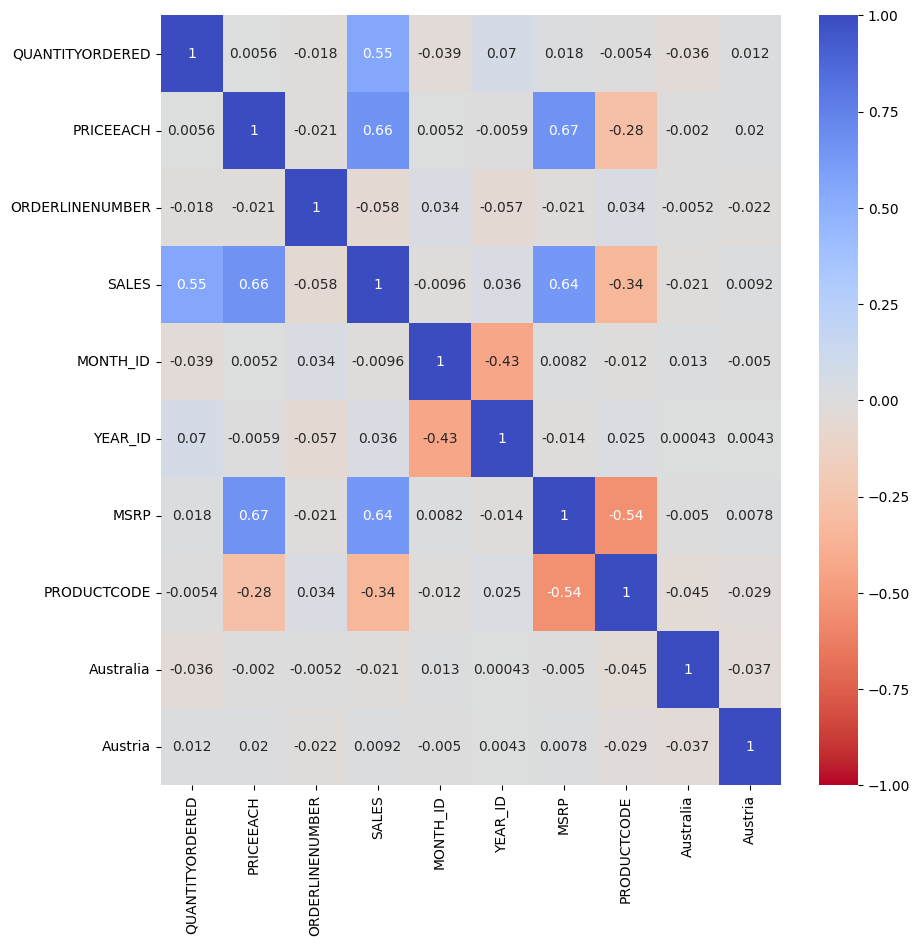

In [50]:
# Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,:10].corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm_r',)

In [47]:
# Dropping QTR_ID variable
df.drop('QTR_ID',axis=1,inplace=True)
df.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,8,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,10,2003,95,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [73]:
# Creating distplot for first variables (show 1-histogram, 2-kde plot and 3-rug plot)

for i in range(8):
  if df.columns[i] != 'ORDERLINENUMBER':
    fig = ff.create_distplot([df[df.columns[i]].apply(lambda x: float(x))], ['displot'])
    fig.update_layout(title_text = df.columns[i])
    fig.show()

In [80]:
# Visualize the relationship between variables using pairplots

plt.figure(figsize=(10,5))

fig = px.scatter_matrix(df,
                        dimensions=df.columns[:8],
                        color='MONTH_ID')

fig.update_layout(title='Sales Data',
                  width=1100,
                  height=1100)

fig.show()

<Figure size 1000x500 with 0 Axes>

## **K-Means**

In [81]:
# Finding the optimal number of clusters by elbow method

## Scaling data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled.shape


(2823, 37)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

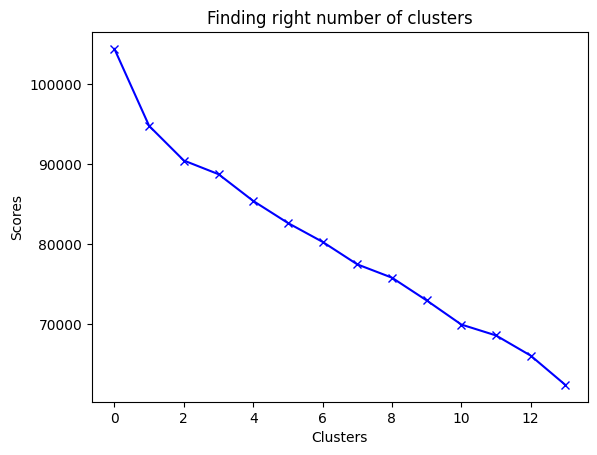

In [83]:
## elbow plot

scores = []

range_values = range(1,15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scaled)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()


In [85]:
# Clustering data
kmeans = KMeans(5)
kmeans.fit(df_scaled)
labels = kmeans.labels_
print(kmeans.cluster_centers_.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



(5, 37)


In [86]:
# Checking cluster centers
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,-0.462204,-0.769914,0.032149,-0.823688,-0.009595,0.002644,-0.585778,0.179496,0.070090,-0.022352,...,-0.101931,0.063010,0.111271,-0.300637,0.100929,-0.006118,0.150541,-0.242672,-0.980703,1.096370
1,-0.091667,-0.081269,0.175374,-0.208751,0.281449,-0.184943,-0.147401,0.169580,-0.264819,-0.140961,...,-0.029442,-0.209037,-0.004029,0.295213,0.007953,-0.160323,0.119917,-0.242672,0.033775,0.077789
2,1.245428,0.800220,-0.259579,2.573861,-0.088008,0.136857,1.430265,-0.871802,-0.084647,0.043374,...,0.580097,0.011712,-0.164278,-0.300637,-0.128350,-0.201008,-0.151285,4.120788,-0.980703,-0.912100
3,-0.052836,0.010528,0.087087,-0.278956,-0.065475,0.027207,-0.364936,1.121489,-0.226515,-0.003802,...,-0.721812,-0.364452,-0.348674,3.326275,-0.167454,-0.345470,-0.523371,-0.242672,-0.070578,0.182564
4,0.276047,0.598921,-0.030792,0.483482,-0.001015,-0.003483,0.424216,-0.263425,0.017420,0.031446,...,0.145660,0.028875,-0.018283,-0.300637,-0.046384,0.109791,-0.039358,-0.242672,1.019676,-0.912100


In [87]:
# Inverse transformation to understand the numbers meaning
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30.591075,68.128843,6.602004,2037.036384,7.057377,2003.816940,77.178506,59.441712,8.287796e-02,1.639344e-02,...,2.941712e-01,1.375228e-01,1.429872e-01,1.068590e-15,4.371585e-02,1.047359e-01,2.768670e-01,5.828671e-16,-1.054712e-15,1.000000e+00
1,34.200000,82.019286,7.207143,3169.465857,8.121429,2003.685714,94.792857,59.128571,1.387779e-17,-3.469447e-18,...,3.285714e-01,5.000000e-02,1.071429e-01,1.642857e-01,2.857143e-02,5.714286e-02,2.642857e-01,5.551115e-17,5.071429e-01,4.928571e-01
2,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,4.458599e-02,2.547771e-02,...,6.178344e-01,1.210191e-01,5.732484e-02,-6.938894e-17,6.369427e-03,4.458599e-02,1.528662e-01,1.000000e+00,-7.216450e-16,1.387779e-15
3,34.578199,83.870900,6.834123,3040.179905,6.853081,2003.834123,86.052133,89.189573,9.478673e-03,1.895735e-02,...,9.436896e-16,-2.775558e-17,2.636780e-16,1.000000e+00,-1.006140e-16,2.914335e-16,4.163336e-16,-1.526557e-16,4.549763e-01,5.450237e-01
4,37.781430,95.739203,6.336072,4444.240312,7.088743,2003.812654,117.760887,45.454396,6.984388e-02,2.382909e-02,...,4.116680e-01,1.265407e-01,1.027116e-01,1.151856e-15,1.972062e-02,1.405094e-01,1.988496e-01,6.522560e-16,1.000000e+00,-6.661338e-16


In [96]:
# Clusters Summary
print('Obs:', labels.shape[0])
print('Min Cluster',labels.min())
print('Max Cluster',labels.max())

Obs: 2823
Min Cluster 0
Max Cluster 4


In [100]:
# predicted
y_kmeans = kmeans.fit_predict(df_scaled)
print('Obs:',y_kmeans.shape[0])
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Obs: 2823


array([1, 1, 3, ..., 4, 4, 4], dtype=int32)

In [102]:
# Adding clusters to dataframe
df_cluster = pd.concat([ pd.DataFrame({'CLUSTER':labels}),df],axis=1)
df_cluster.head()

,CLUSTER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,0,30,95.70,2,2871.00,2,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,34,81.35,5,2765.90,5,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
2,4,41,94.74,2,3884.34,7,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
3,4,45,83.26,6,3746.70,8,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
4,4,49,100.00,14,5205.27,10,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0


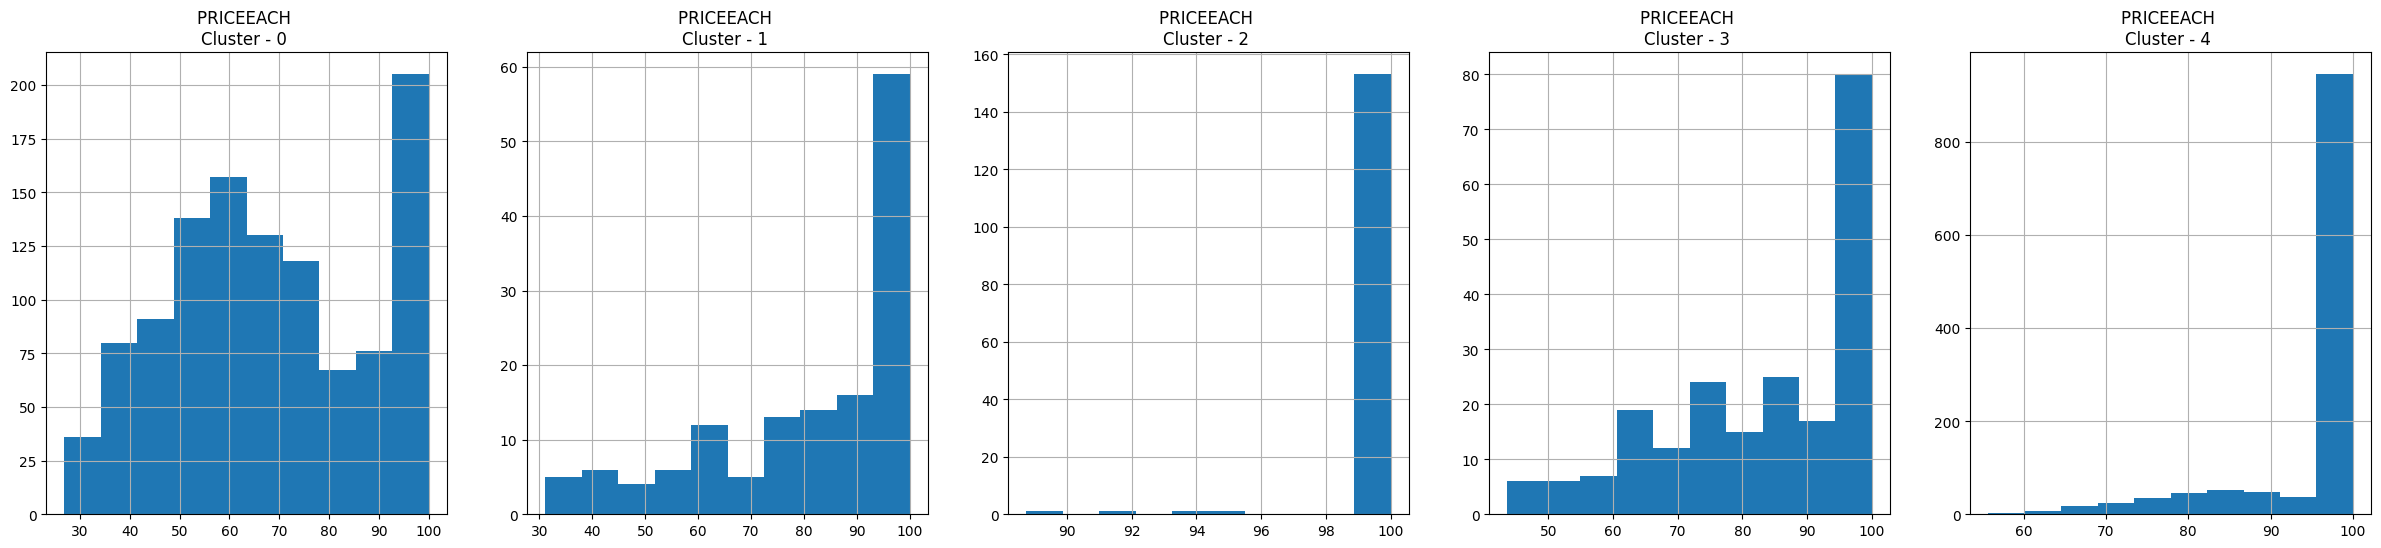

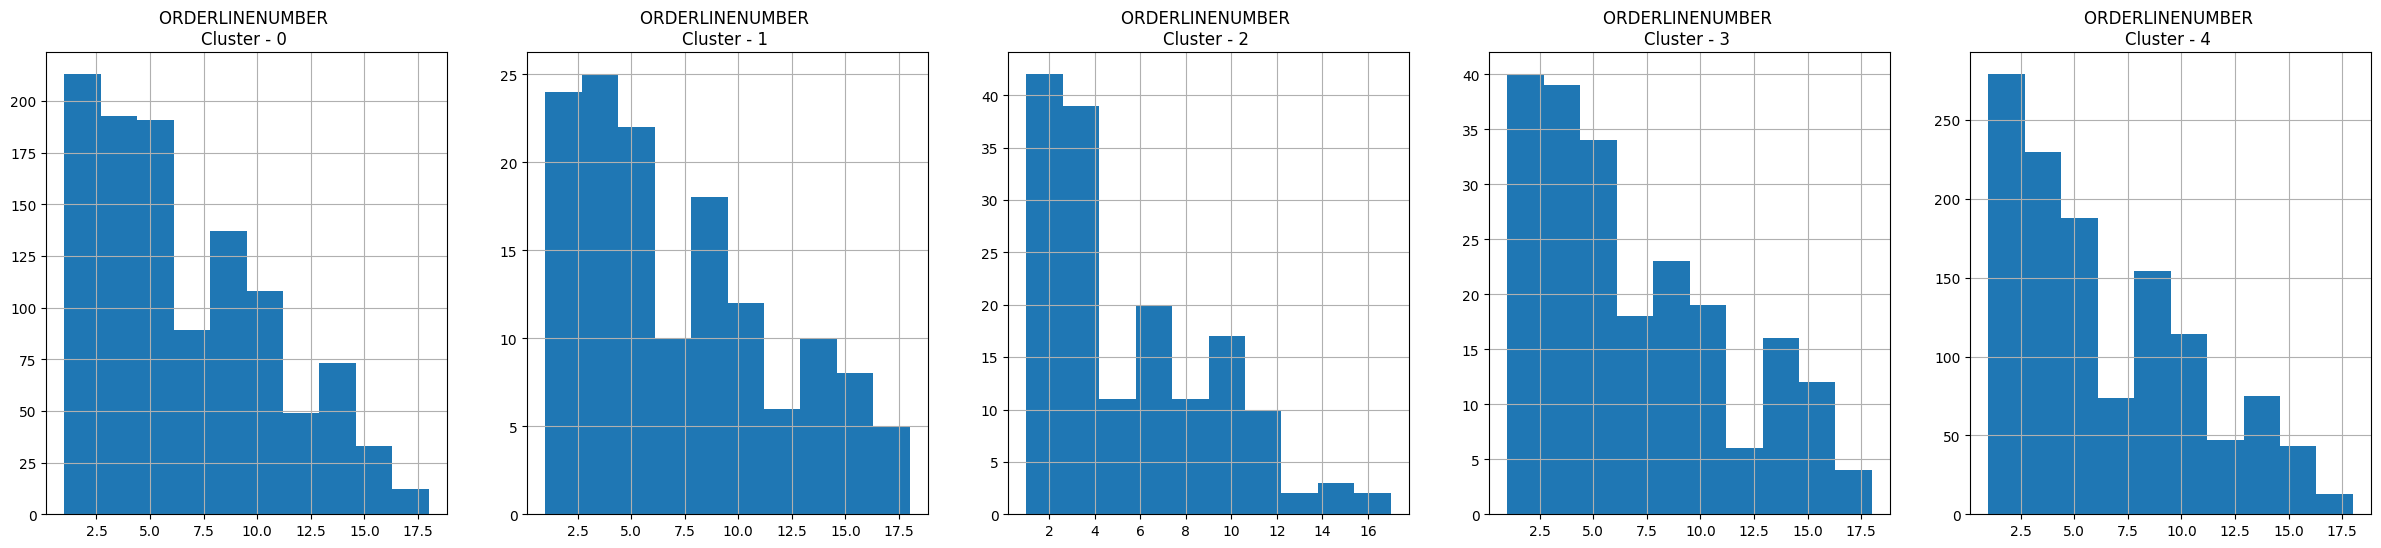

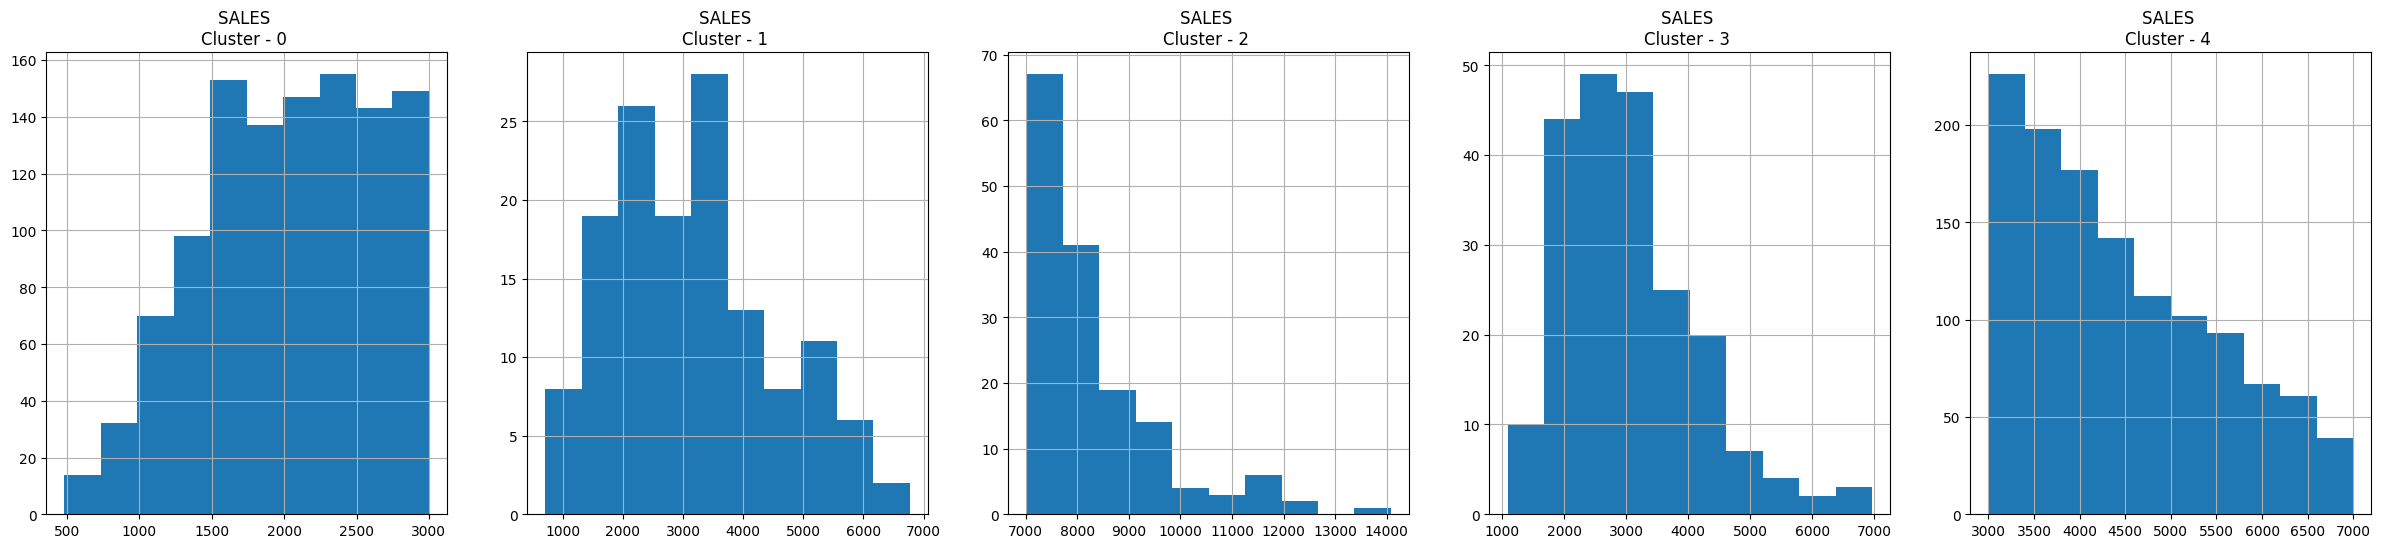

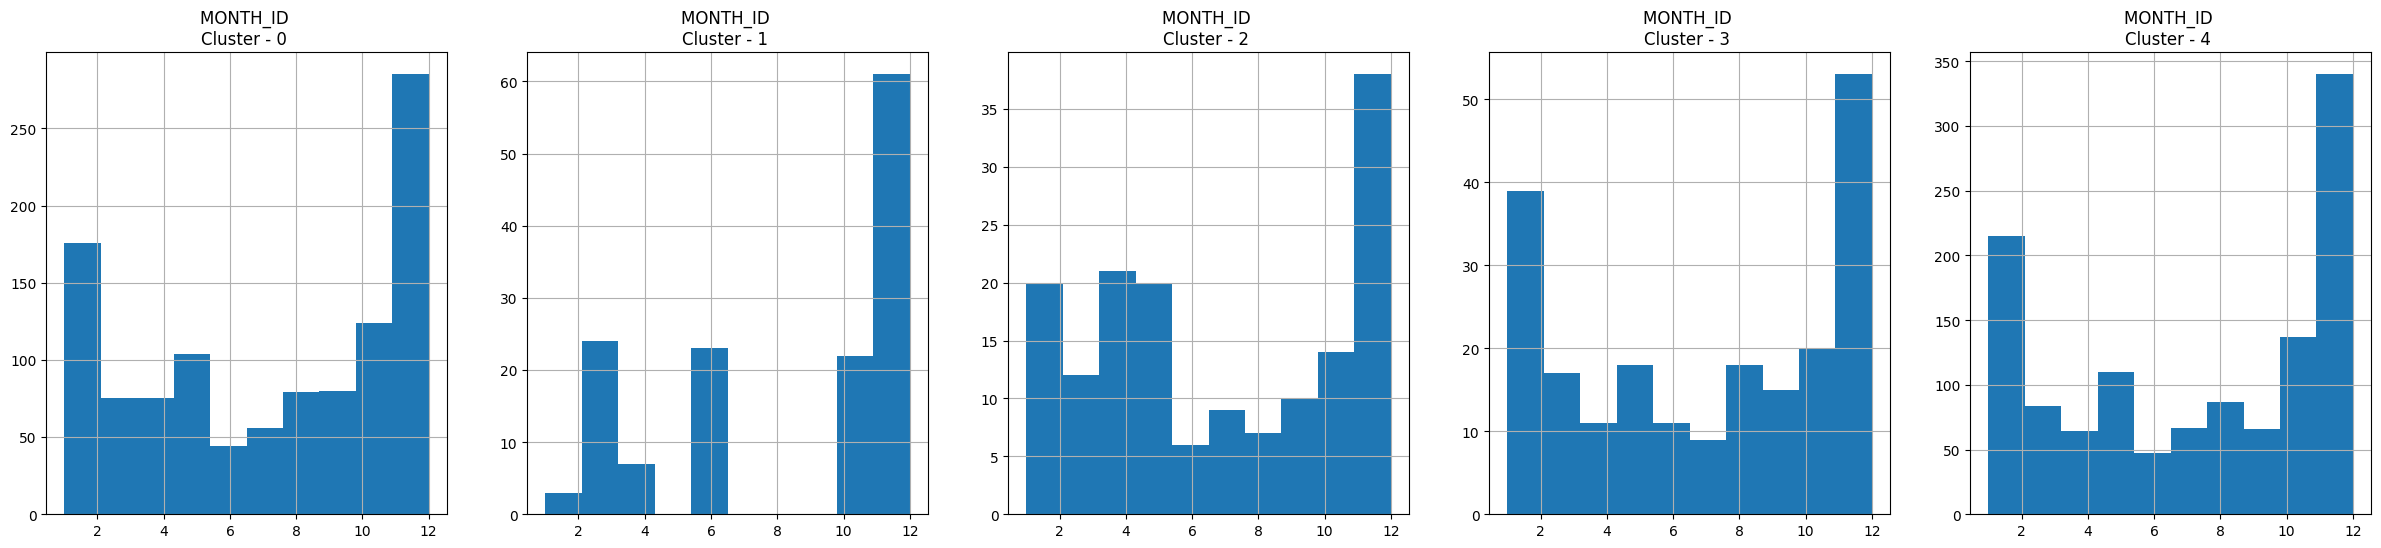

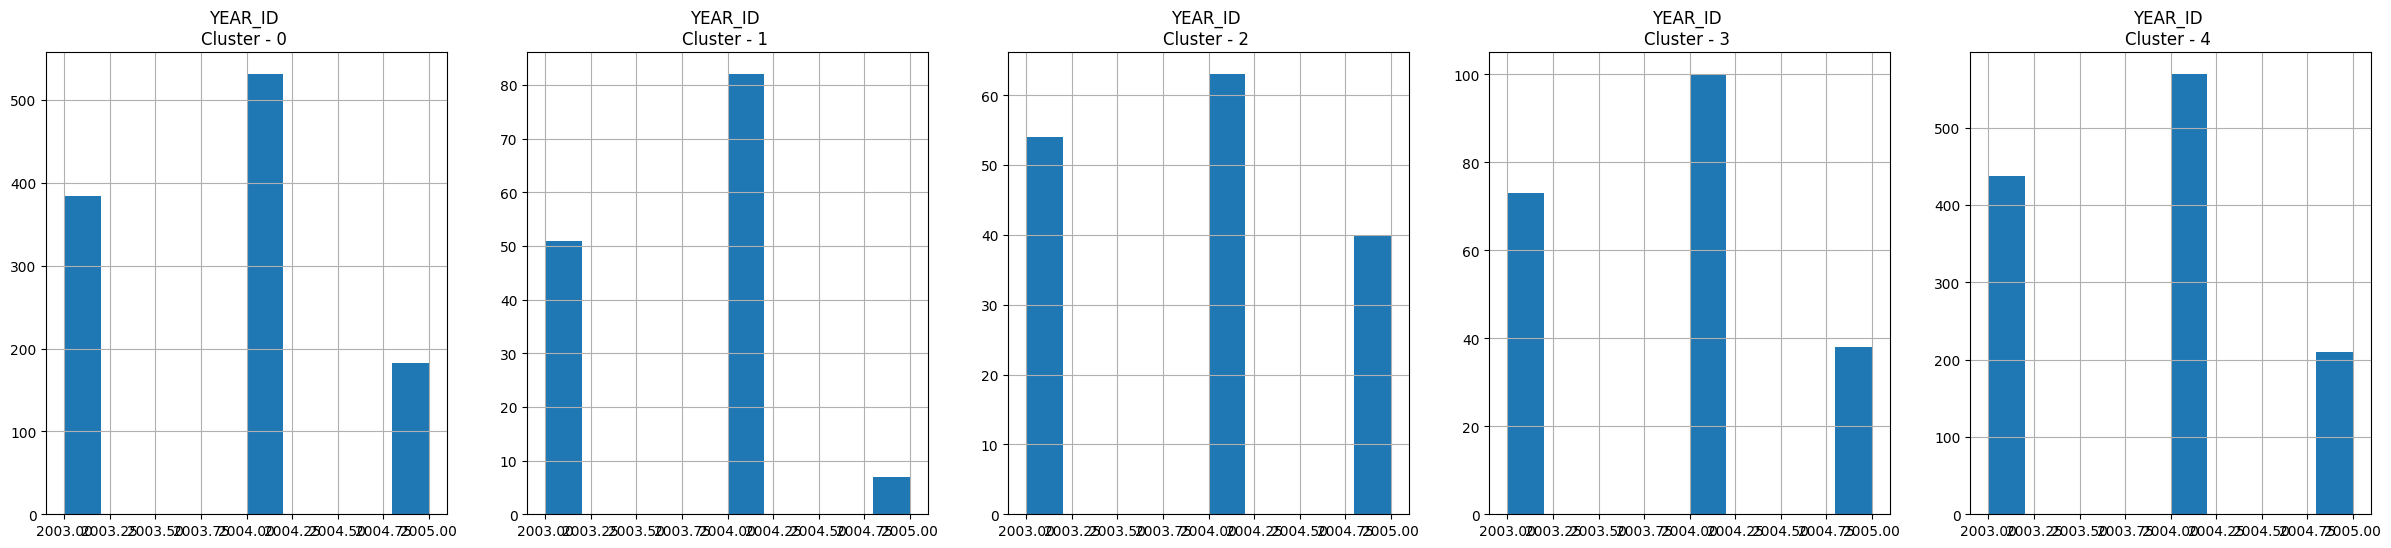

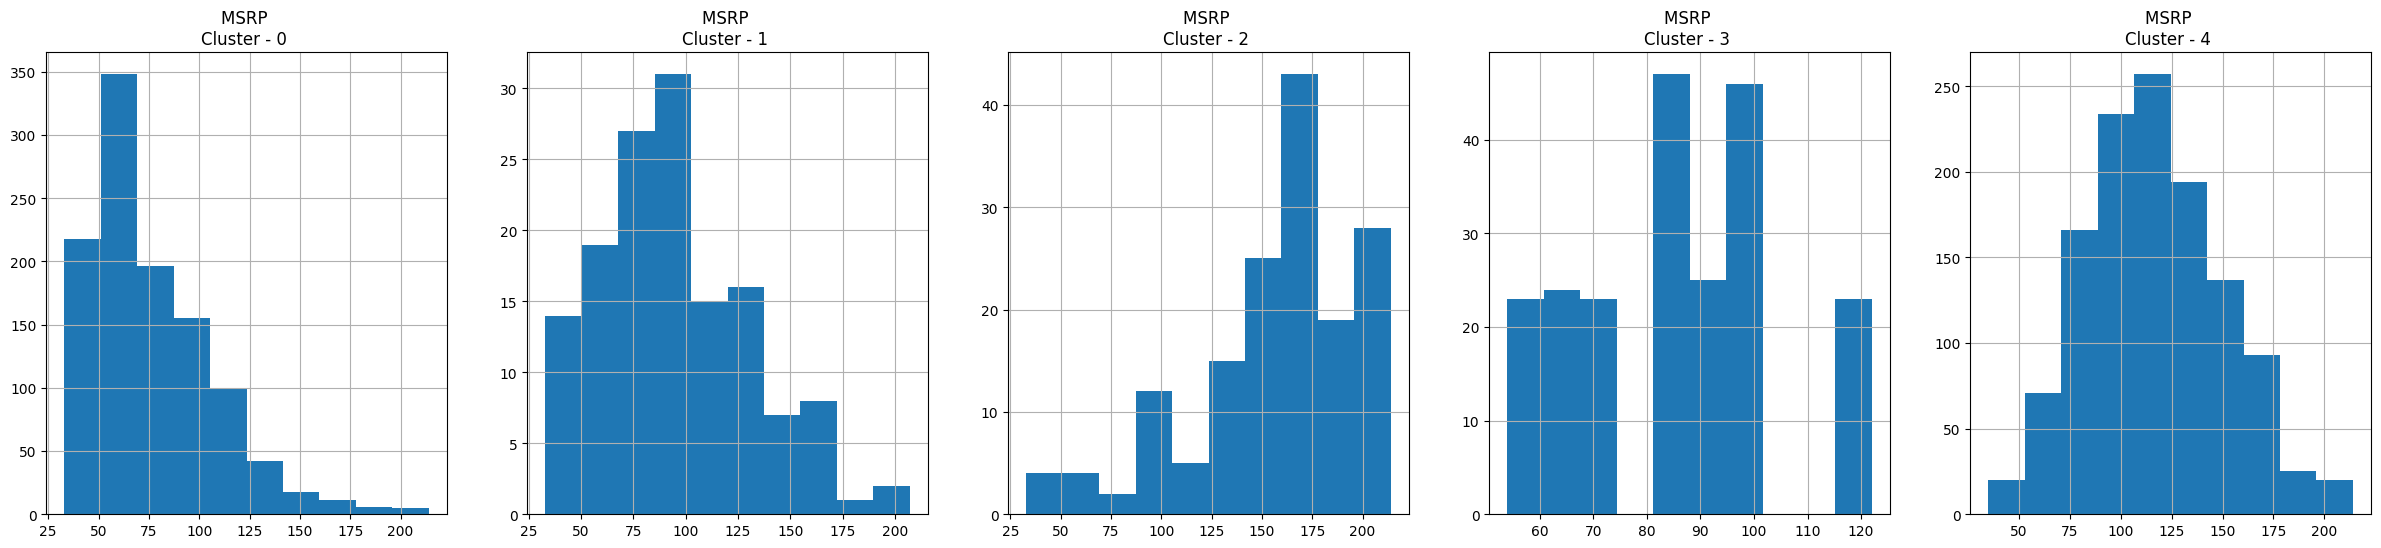

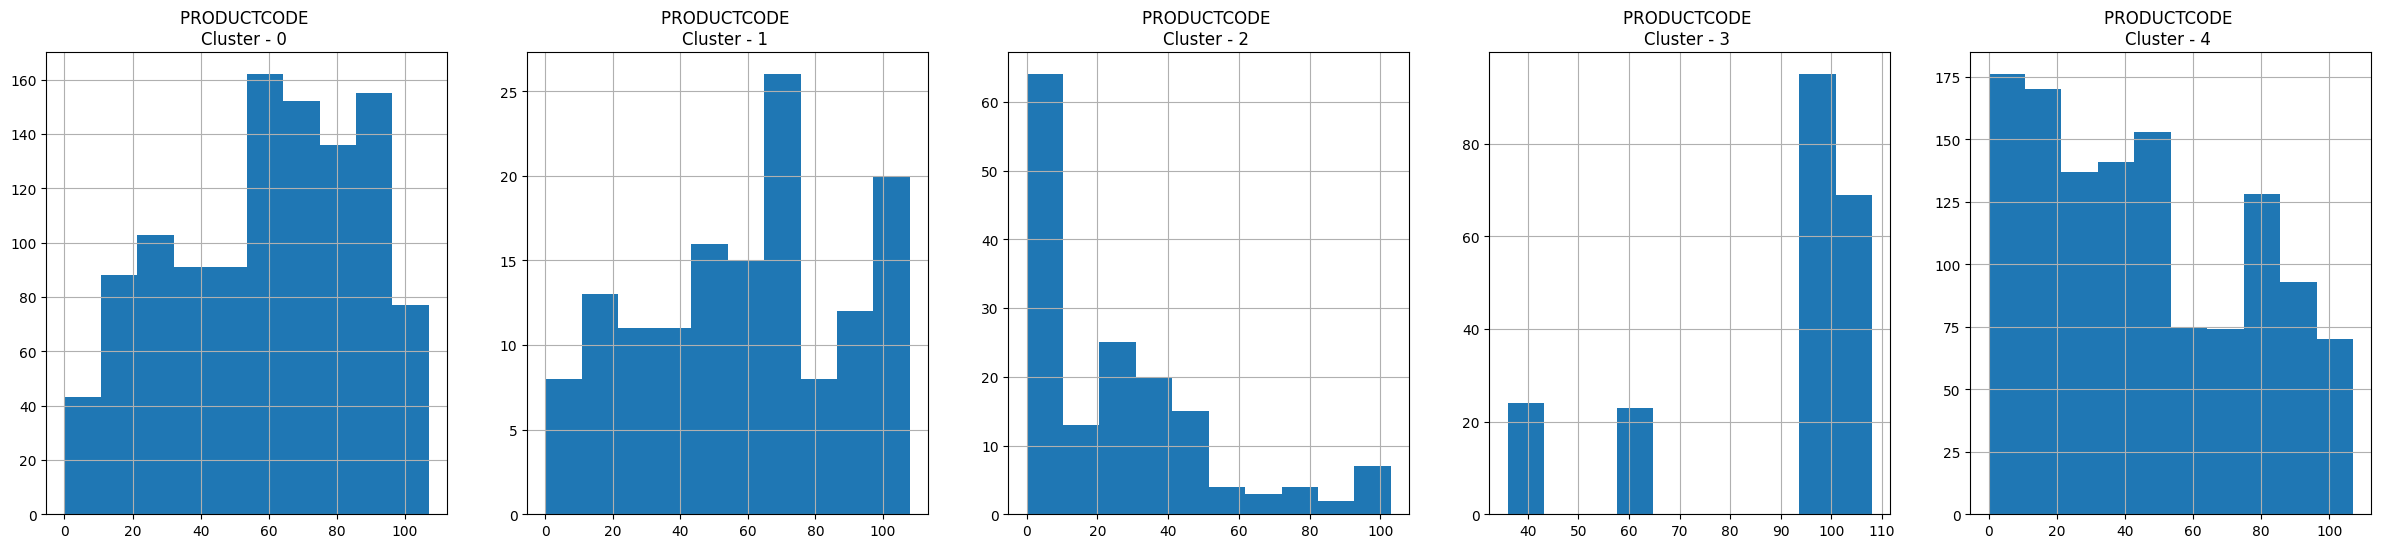

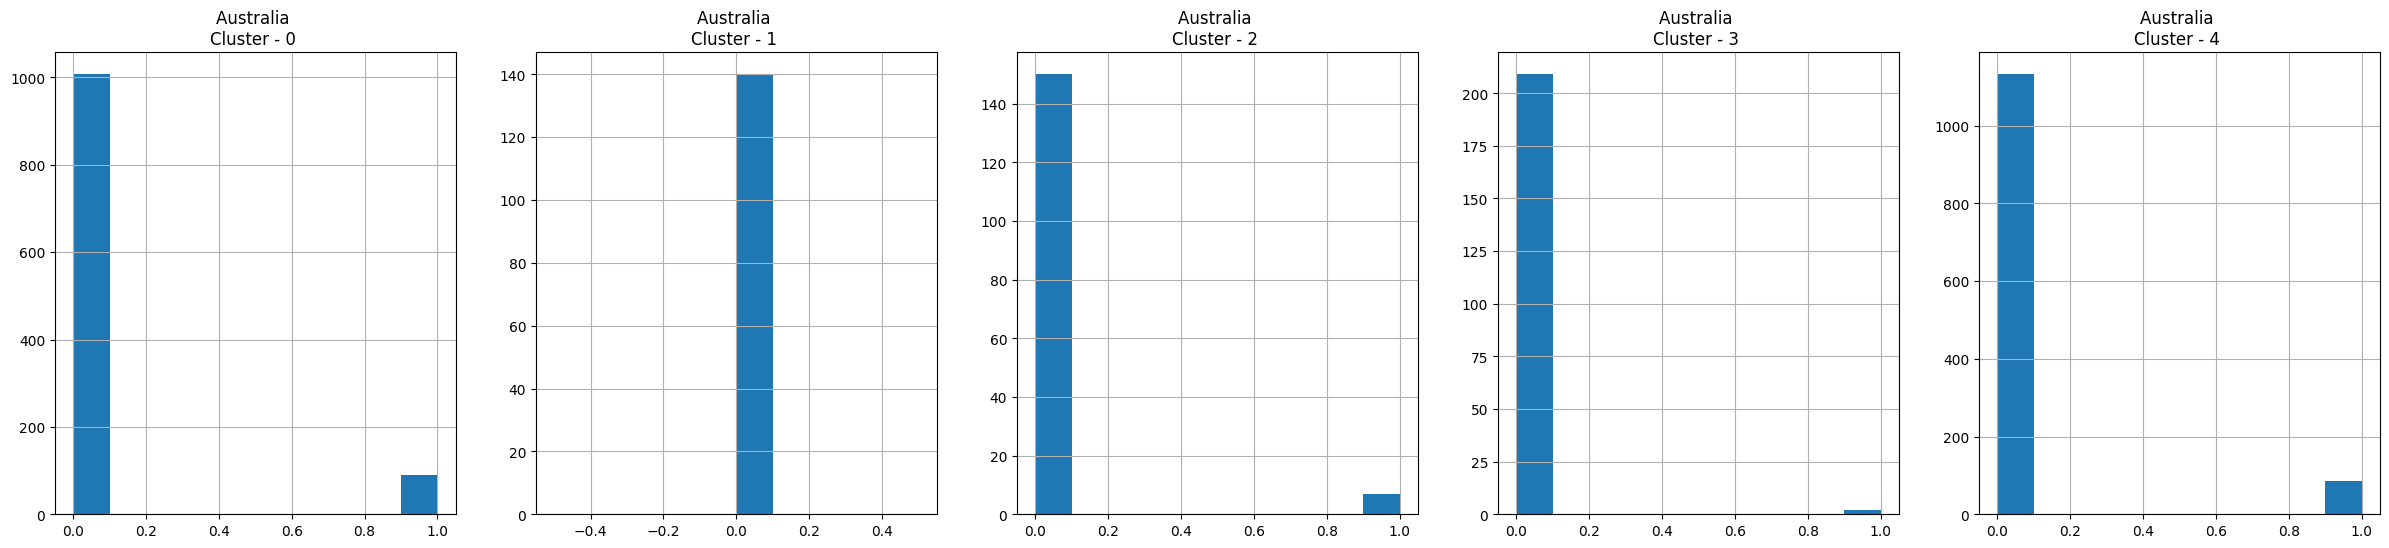

In [104]:
# Plotting histogram for each feature based on cluster
df['ORDERLINENUMBER'] = df['ORDERLINENUMBER'].apply(lambda x: float(x))

for i in df.columns[1:9]:
  plt.figure(figsize=(30,6))
  for j in range(5):
    plt.subplot(1,5,j+1)
    cluster = df_cluster[df_cluster['CLUSTER']==j]
    cluster[i].hist()
    plt.title('{} \nCluster - {} '.format(i,j))

  plt.show()



## **PCA**

In [105]:
# Reducing the original data to 3 dimensions using PCA for visualizing the clusters
pca = PCA(n_components=3)
prin_comp = pca.fit_transform(df_scaled)
prin_comp

array([[-0.48625605, -1.18173432,  1.01230361],
       [-0.78464488, -1.035793  ,  1.45159164],
       [ 1.43145857,  0.11768032,  0.29892789],
       ...,
       [ 0.3898798 ,  4.16007031, -0.02896516],
       [-2.78895507,  2.37327219,  1.57021805],
       [-0.70554107,  3.32094343, -0.46640039]])

In [108]:
# Converting to dataframe and concatenating clusters
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1','pca2','pca3'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486256,-1.181734,1.012304,0
1,-0.784645,-1.035793,1.451592,0
2,1.431459,0.117680,0.298928,4
3,1.288460,-0.202543,-0.542646,4
4,1.976069,-0.123795,-0.989845,4


In [111]:
# Visualizing Clusters
fig = px.scatter_3d(pca_df, x='pca1', y='pca2', z='pca3', color='cluster', symbol='cluster', size_max=18, opacity=0.7)
fig.update_layout(margin= dict(l=0, r=0, b=0, t=0))

## **Performing dimensionality reduction using autoencoders**

In [117]:
# Glorot uniform initializer
input_df = Input(shape=(37,))
x = Dense(50, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(8, activation='relu', kernel_initializer='glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer='glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(37, kernel_initializer='glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

# encoder - used for dimensionality reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer='adam', loss='mean_squared_error')

#fitting
autoencoder.fit(df_scaled, df, batch_size=128, epochs=500, verbose=3)

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

89/89 [==============================] - 1s 6ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

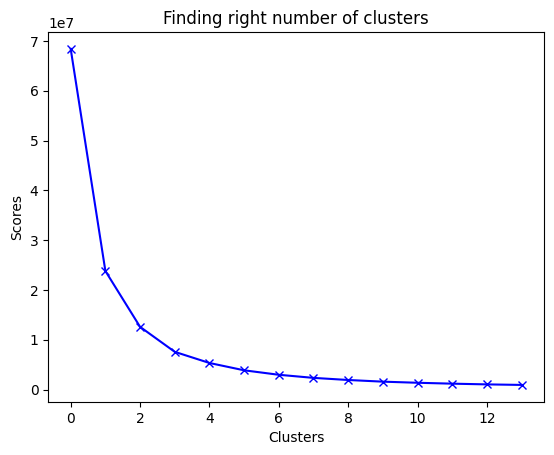

In [118]:
# Saving
# autoencoder.save_weights(autoencoder_1.h5)

# Predicting
pred = encoder.predict(df_scaled)


# Elbow plot using prediction

scores = []

range_values = range(1,15)

for i in range_values:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(pred)
  scores.append(kmeans.inertia_)

plt.plot(scores, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

In [119]:
# Selecting new k
kmeans = KMeans(3)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(df_scaled)

# Concatenating to dataframe
df_cluster_dr = pd.concat([pd.DataFrame({'cluster':labels}),df],axis=1)
df_cluster_dr.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



,cluster,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,2,30,95.70,2.0,2871.00,2,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2,34,81.35,5.0,2765.90,5,2003,95,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,41,94.74,2.0,3884.34,7,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,45,83.26,6.0,3746.70,8,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,49,100.00,14.0,5205.27,10,2003,95,0,0,...,0,1,0,0,0,0,0,0,1,0


In [120]:
# scaling and inversing data
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=[df.columns])
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=[df.columns])
cluster_centers

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTCODE,Australia,Austria,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30.525741,69.047496,6.649766,2061.682800,7.118565,2003.812793,77.340094,62.788612,0.071763,0.017161,...,0.265211,0.121685,0.131045,9.906396e-02,0.039002,0.092824,0.251170,6.869505e-16,-1.110223e-15,1.000000e+00
1,37.947254,95.361741,6.420520,4398.433699,7.104769,2003.806358,115.848988,48.545520,0.062139,0.020954,...,0.382948,0.112717,0.093208,7.731214e-02,0.018786,0.126445,0.188584,7.424616e-16,1.000000e+00,-3.885781e-16
2,47.222930,99.799554,5.369427,8293.753248,6.770701,2003.910828,158.184713,26.242038,0.044586,0.025478,...,0.617834,0.121019,0.057325,-6.938894e-17,0.006369,0.044586,0.152866,1.000000e+00,-7.216450e-16,1.387779e-15


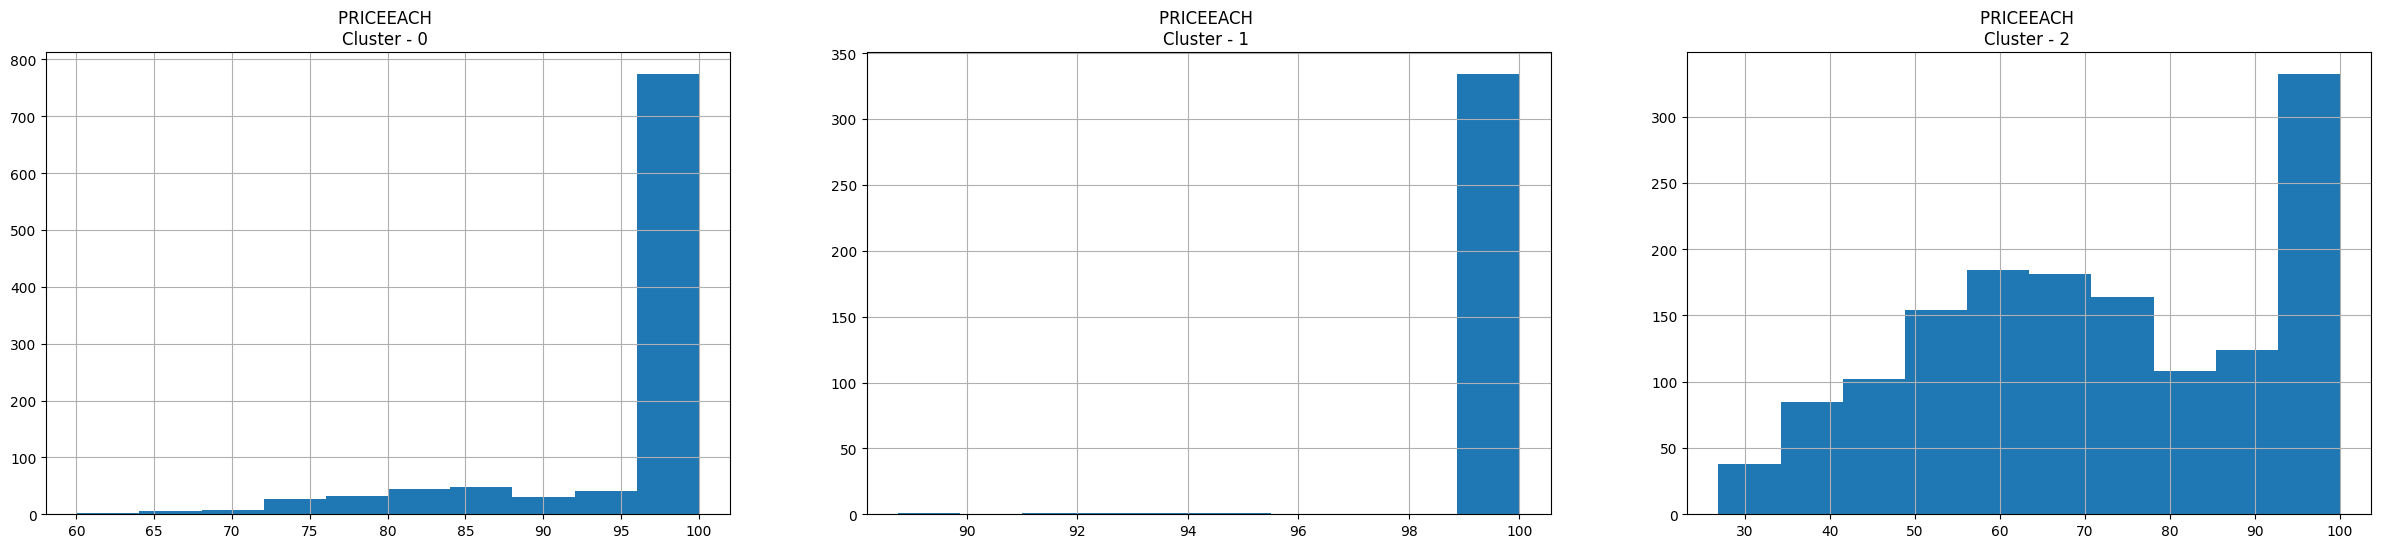

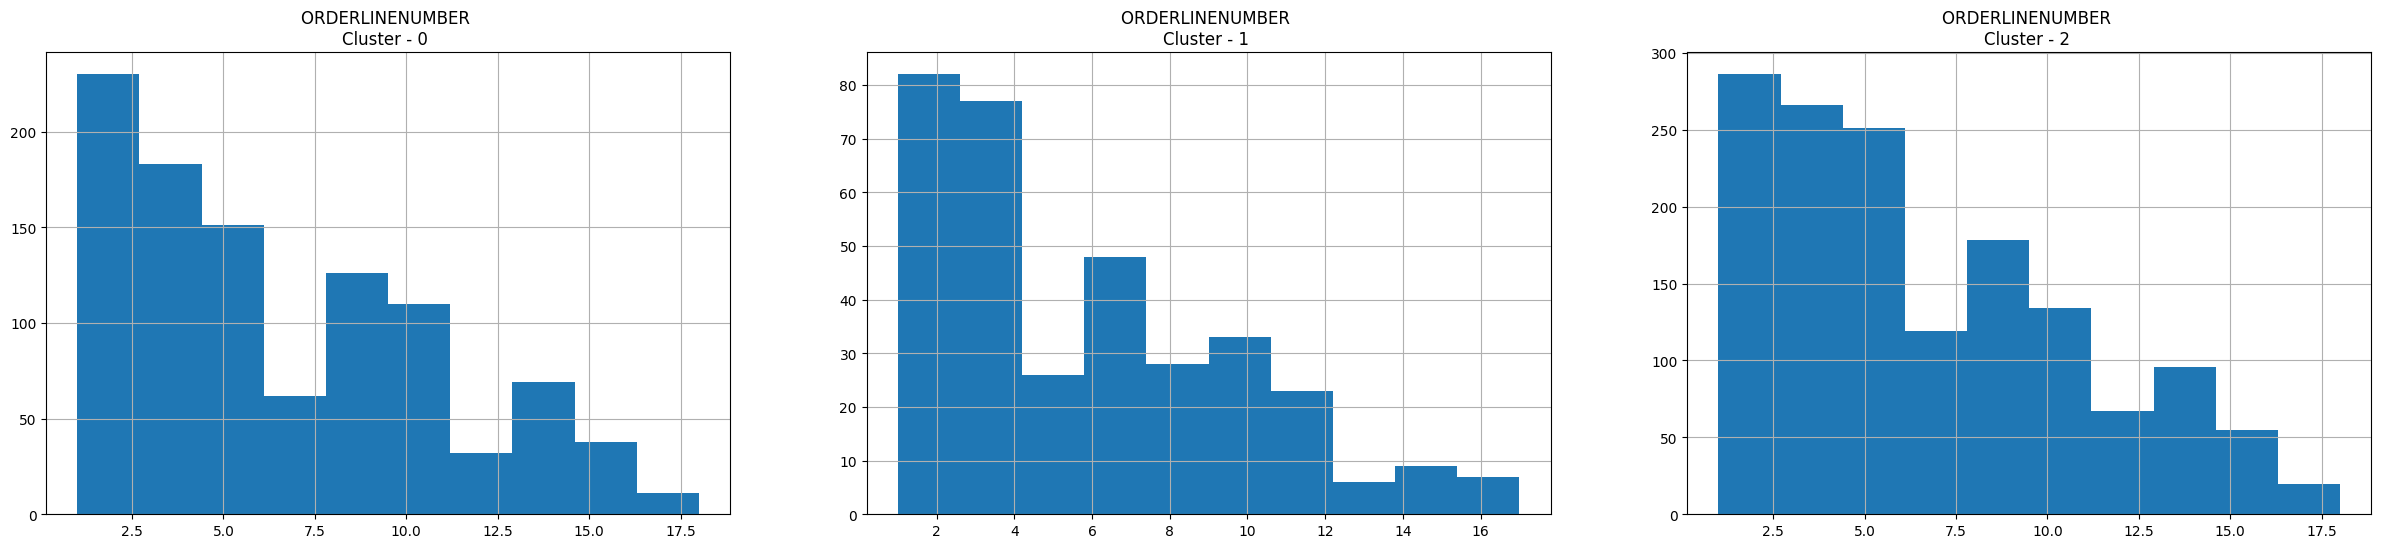

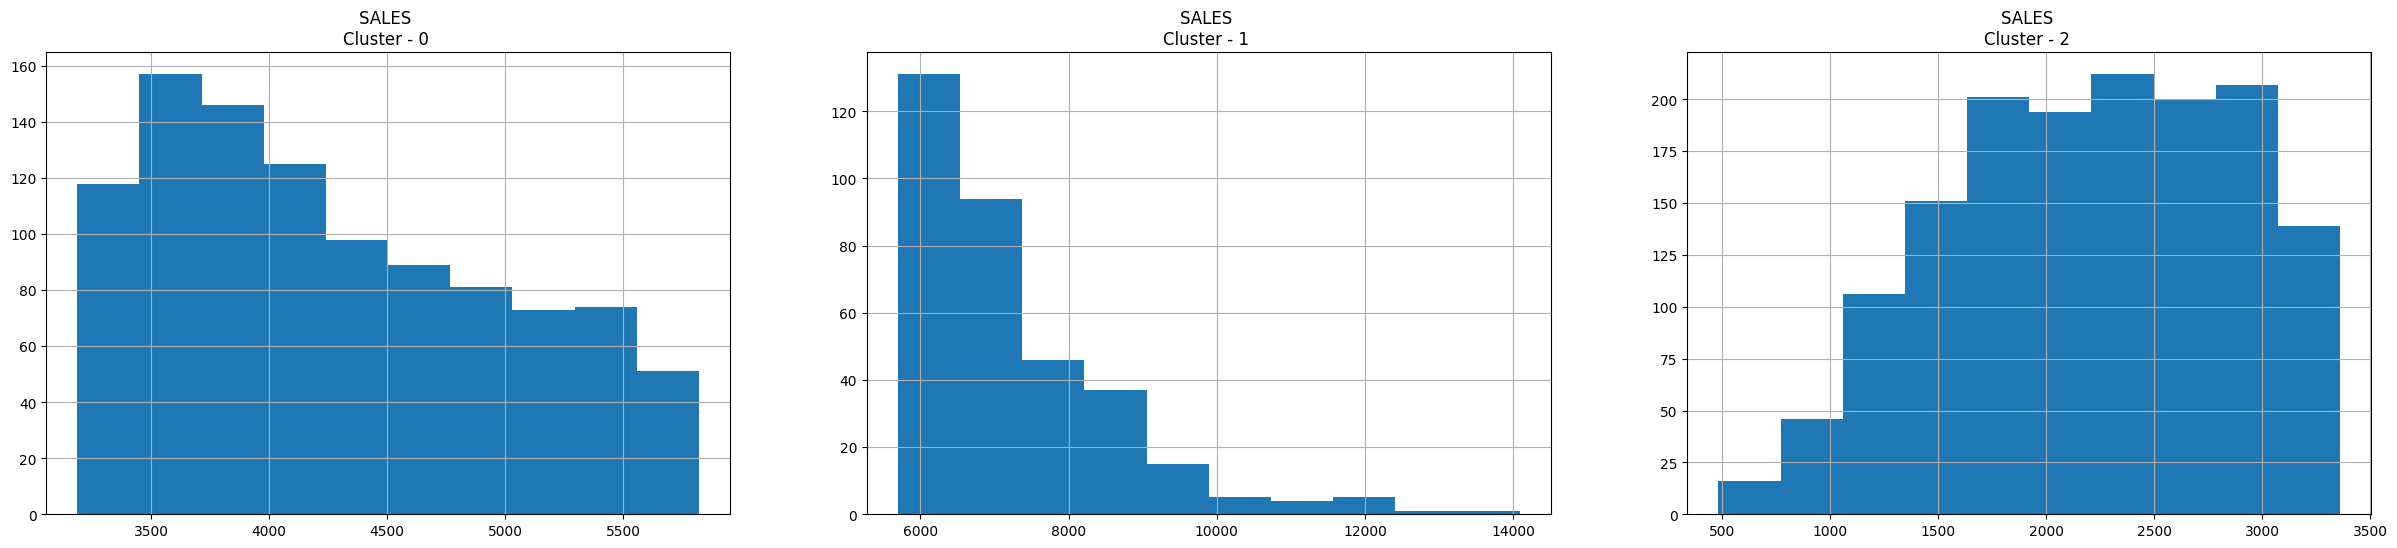

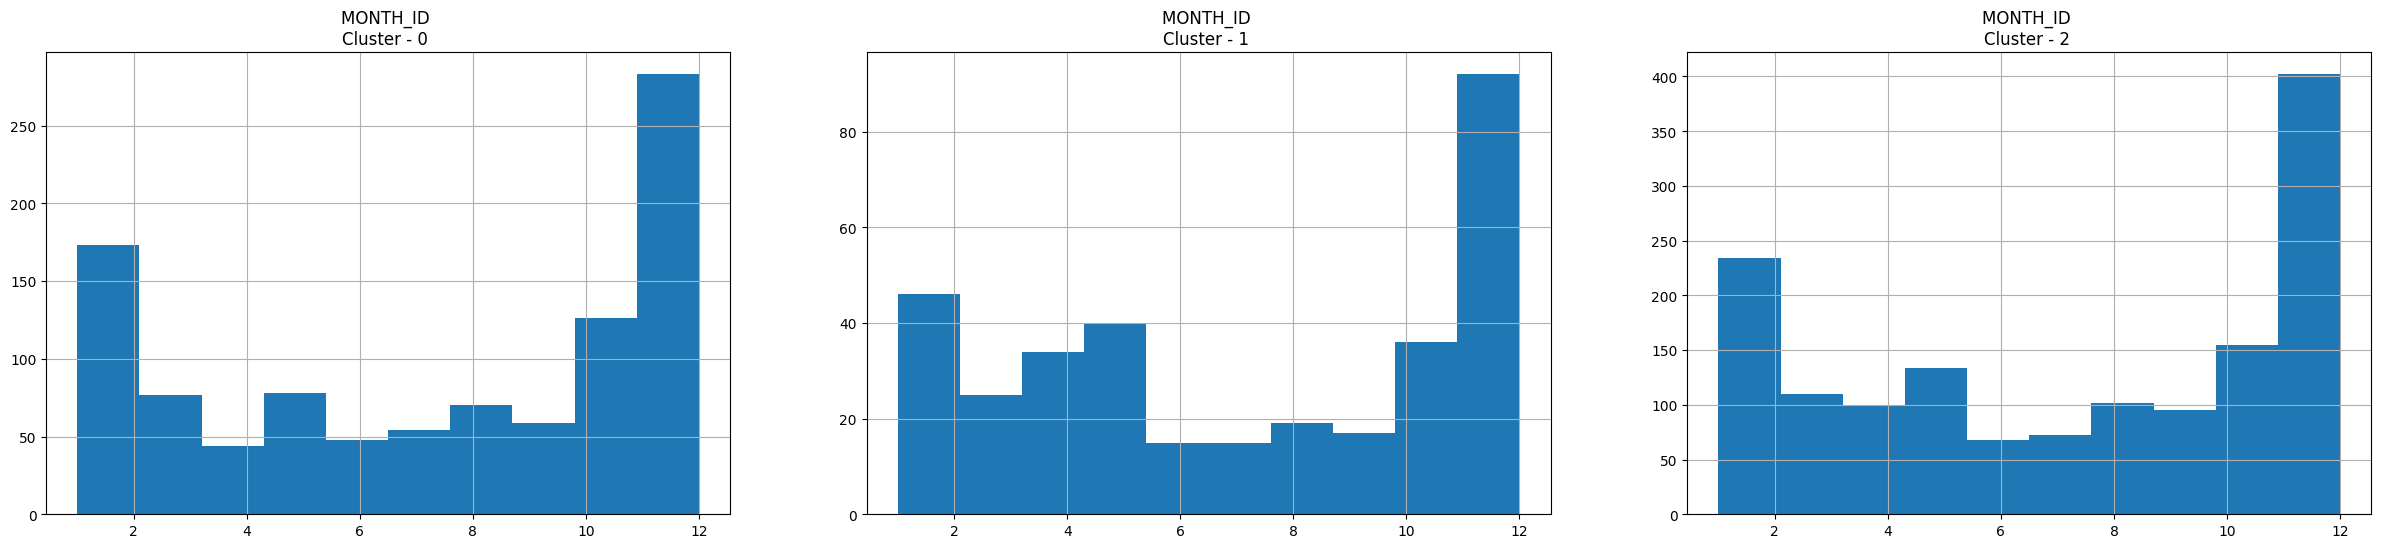

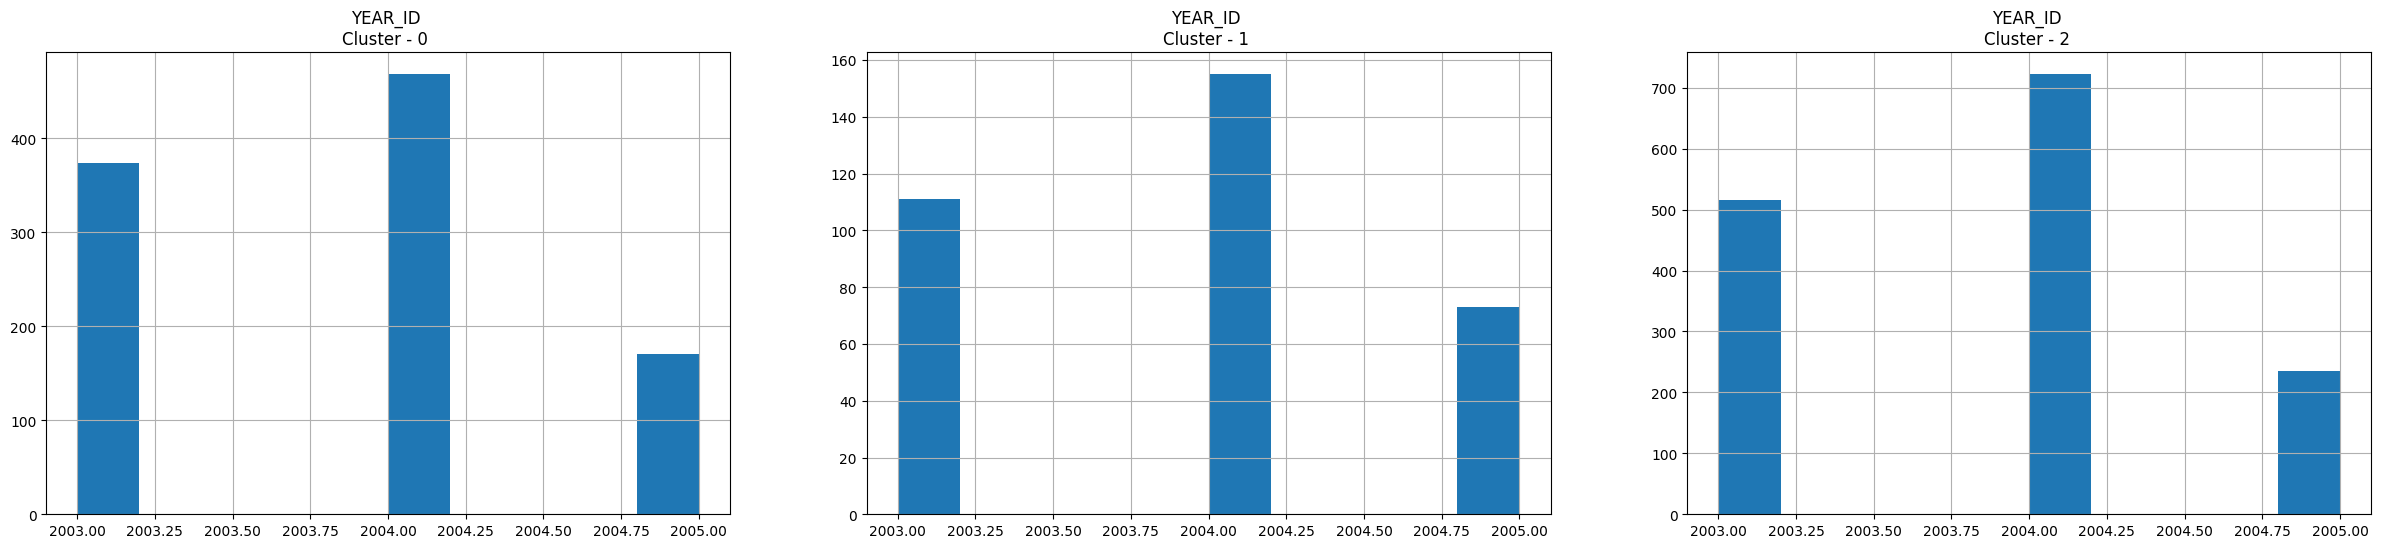

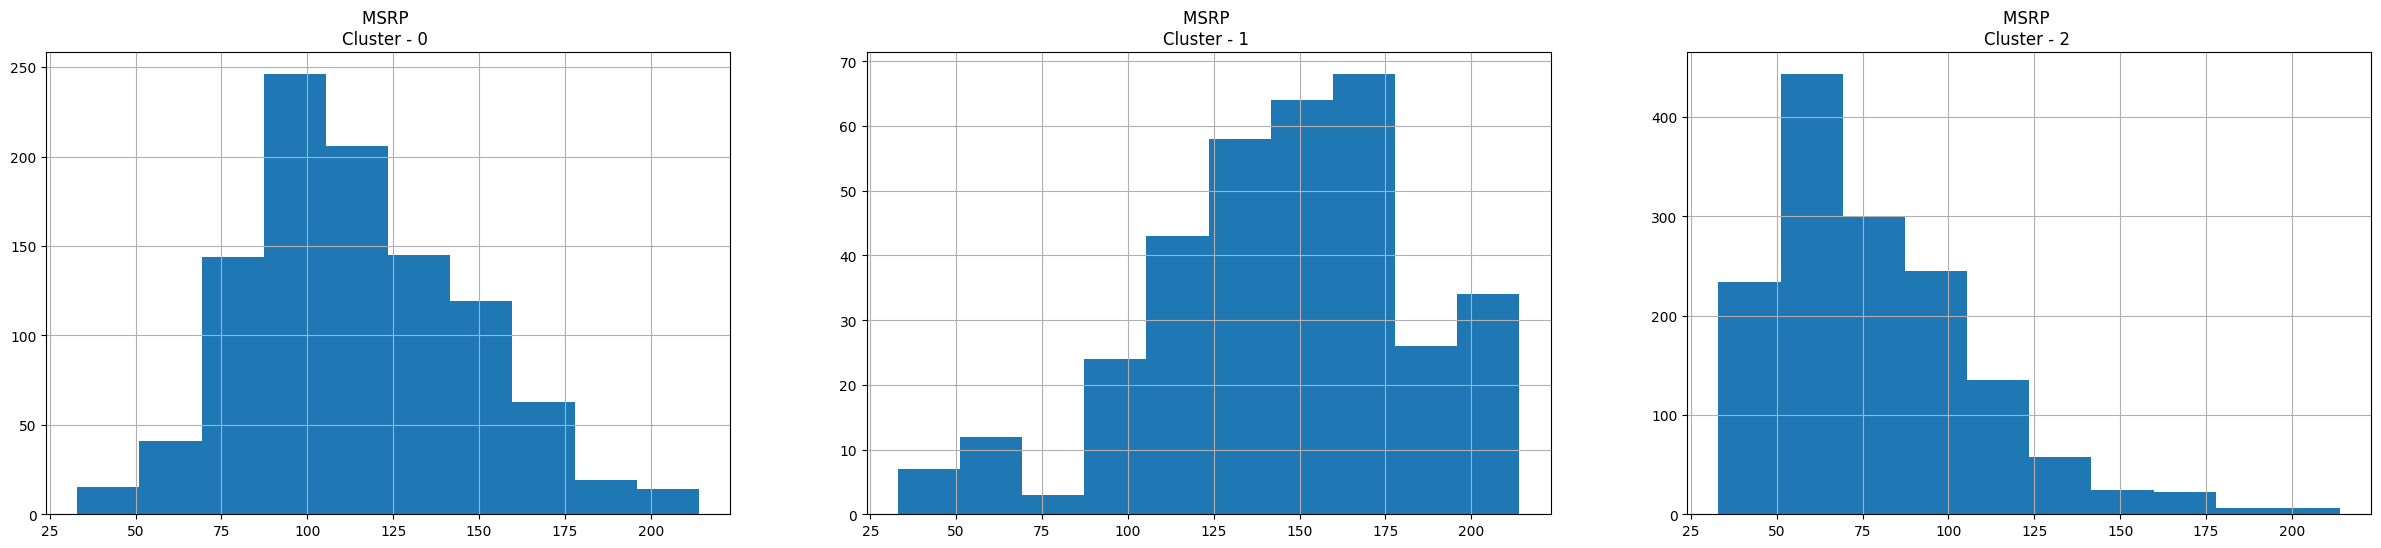

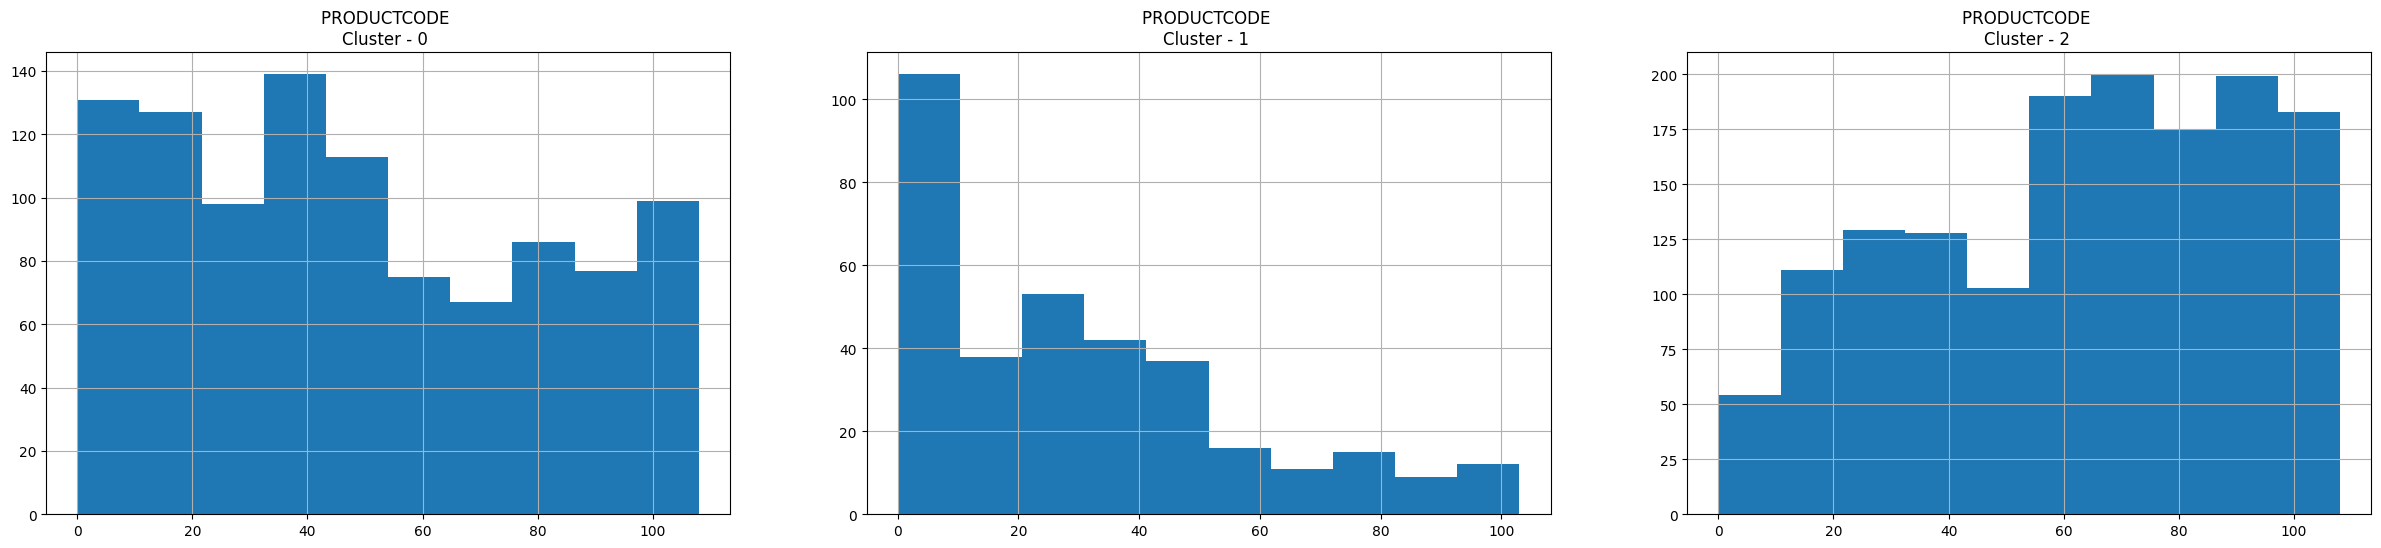

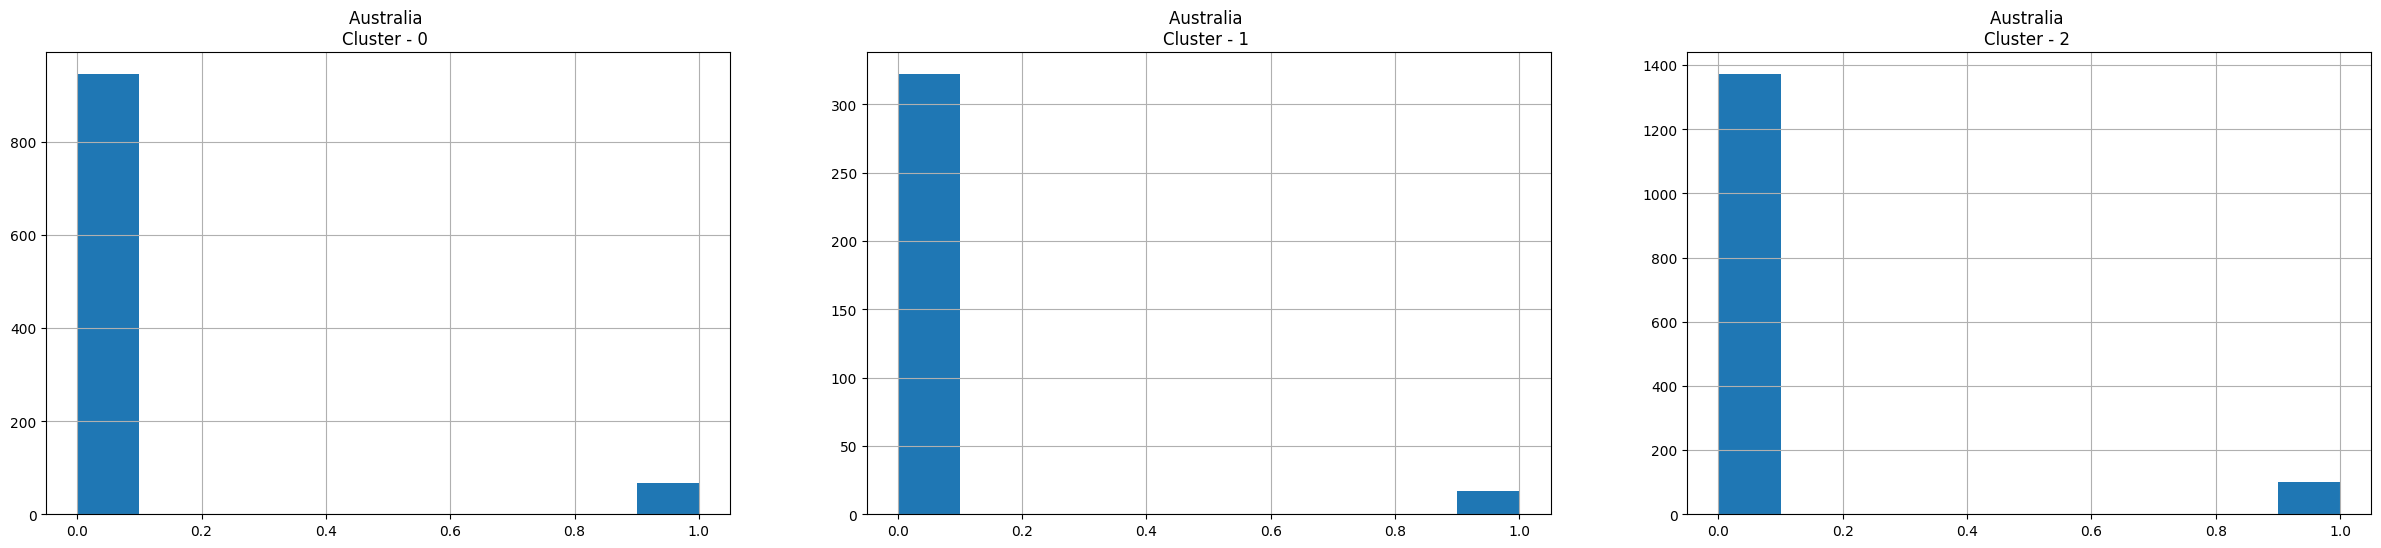

In [122]:
# Plotting histogram for each feature based on cluster

for i in df.columns[1:9]:
  plt.figure(figsize=(30,6))
  for j in range(3):
    plt.subplot(1,3,j+1)
    cluster = df_cluster_dr[df_cluster_dr['cluster']==j]
    cluster[i].hist()
    plt.title('{} \nCluster - {} '.format(i,j))

  plt.show()


In [123]:
# Converting to dataframe and concatenating new clusters
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1','pca2','pca3'])
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})],axis=1)
pca_df.head()

,pca1,pca2,pca3,cluster
0,-0.486256,-1.181734,1.012304,2
1,-0.784645,-1.035793,1.451592,2
2,1.431459,0.117680,0.298928,0
3,1.288460,-0.202543,-0.542646,0
4,1.976069,-0.123795,-0.989845,0


In [124]:
# Visualizing Clusters
fig = px.scatter_3d(pca_df, x='pca1', y='pca2', z='pca3', color='cluster', symbol='cluster', size_max=18, opacity=0.7)
fig.update_layout(margin= dict(l=0, r=0, b=0, t=0))